# Exam - 10/01/2025

## Exercise 1
Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **matrix-II.mat**.
 - Si risolva ciascuno dei sistemi lineari assegnati  utilizzato il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate. **punti 5**
 - Per il primo sistema lineare A x= b,  aggiungere una perturbazione dell' 1% sulla componente b[0]  del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria, richiamando il teorema relativo. **punti 3** 

 

In [443]:
import numpy as np

def conjugate_gradient(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        it += 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / (p.T @ Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        errore = np.linalg.norm(r_new) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        if errore < toll:
            break
        gamma = (r_new.T @ r_new) / rtr
        p = r_new + gamma * p
        r = r_new

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it



In [444]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

dati = loadmat("./mat/matrix-I.mat")
A = dati["A"].astype(float)
b = dati["b"].astype(float)

A1 = dati["A1"].astype(float)
b1 = dati["b1"].astype(float)


def isQuadratic(A):
    return A.shape[0] == A.shape[1]


def isSymmetric(A):
    return np.allclose(A, A.T)


def isPositive(A):
    return np.all(np.linalg.eigvals(A) > 0)


def isSparse(A):
    return np.count_nonzero(A) < A.size * 0.33


def rank(A, b):
    return np.linalg.matrix_rank(A) == np.linalg.matrix_rank(np.hstack([A, b]))


print("[A] quadratica?", isQuadratic(A))
print("[A] simmetrica?", isSymmetric(A))
print("[A] def. positiva?", isPositive(A))
print("[A] sparsa?", isSparse(A))
print("[A] dimensione:", A.shape)
print("[A] rango massimo?", rank(A, b))
print("[A] condizionamento:", np.linalg.cond(A), "\n")

bp = b.copy()
bp[0] = b[0] * 1.001

x0 = np.zeros((b.size, 1))
x, er, it_a, it = conjugate_gradient(A, b, x0, max_it=300)
x_p, er_p, it_a_p, it_p = conjugate_gradient(A, bp, x0)

er_d = np.linalg.norm(bp - b) / np.linalg.norm(b) 
er_s = np.linalg.norm(x_p - x) / np.linalg.norm(x) 

print("[A] soluzione trova dopo n it", it)
print("[A] errore dati", er_d)
print("[A] errore soluzione", er_s, "\n")

print("[A1] quadratica?", isQuadratic(A1))
print("[A1] simmetrica?", isSymmetric(A1))
print("[A1] def. positiva?", isPositive(A1))
print("[A1] sparsa?", isSparse(A1))
print("[A1] dimensione:", A1.shape)
print("[A1] rango massimo?", rank(A1, b1))
print("[A1] condizionamento:", np.linalg.cond(A1), "\n")

x0 = np.zeros((b1.size, 1))
x, er, it_a, it = conjugate_gradient(A1, b1, x0)

print("[A1] soluzione trova dopo n it", it)

# ho optato per il gradiente cogniugato, per complessita minore, le matrici sono entrambe grandi, sparse, positive e simmettriche
# hanno anhce il rango massimo, ciò mi fa notare che hanno un'unica soluzione

# per il teorema dell'errore relativo, quindi errore sulla soluzione <= k(A) * errore sui dati
# notiamo che la soluzione è circa 500 volte l'errore macchina, ed è coerente con il numero di condizionamento
# quindi anche una piccola peturbazone nei dati può causare un erorre aplificato nella soluzione se la matrice
# è mal condizionata come nel nostro caso

[A] quadratica? True
[A] simmetrica? True
[A] def. positiva? True
[A] sparsa? True
[A] dimensione: (500, 500)
[A] rango massimo? True
[A] condizionamento: 500.0000000000122 

[A] soluzione trova dopo n it 255
[A] errore dati 0.000137372908682327
[A] errore soluzione 0.0005688737568810123 

[A1] quadratica? True
[A1] simmetrica? True
[A1] def. positiva? True
[A1] sparsa? True
[A1] dimensione: (800, 800)
[A1] rango massimo? True
[A1] condizionamento: 10.00000000000026 

[A1] soluzione trova dopo n it 42


Dato il sistema lineare A2 x2 = b2 dove 
   
    A2 = np.array([[8, 0, 1], [0, 12, 2], [1, 2, -14.0]])
    b2 = np.array([9.0, 14.0, -11.0])

 - Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di matrici **punti[1]**.
 - Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A2 x2 = b2 con  **punti[3]**.

Totale **Punti 12**

In [445]:
from SolveTriangular import *

def gauss_seidel(A, b, x0, max_it=100, toll=1e-12):
    if b.ndim == 1:
        b = b.reshape(-1, 1)

    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = invM @ N
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)

    er = []
    while len(er) <= max_it and errore >= toll:
        x, flag = Lsolve(M, b - F @ x0)
        if flag == 1:  # Error in Lsolve
            break
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er.append(errore)
        x0 = x.copy()

    return x, er, len(er)

In [446]:
# il teorema di Gauss-seidel garantisce la convergenza se la matrice è simmetrica e def. positiva
import scipy

A2 = np.array([[8, 0, 1], [0, 12, 2], [1, 2, -14.0]])
b2 = np.array([9.0, 14.0, -11.0])

print("[A2] quadratica?", isQuadratic(A2))
print("[A2] simmetrica?", isSymmetric(A2))
print("[A2] def. positiva?", isPositive(A2))
print("[A2] sparsa?", isSparse(A2))
print("[A2] dimensione:", A2.shape)
print("[A2] rango massimo?", rank(A2, b2.reshape(-1, 1)))
print("[A2] condizionamento:", np.linalg.cond(A2), "\n")

x0 = np.zeros((b2.size, 1))
x, er, it = gauss_seidel(A2, b2, x0)

print("[A2] soluzione", x.flatten())

print("Ax = b:", (A2 @ x).flatten(), "=", b2)

[A2] quadratica? True
[A2] simmetrica? True
[A2] def. positiva? False
[A2] sparsa? False
[A2] dimensione: (3, 3)
[A2] rango massimo? True
[A2] condizionamento: 1.7651462497889765 

raggio spettrale Gauss-Seidel  0.03273809523809523
[A2] soluzione [1. 1. 1.]
Ax = b: [  9.  14. -11.] = [  9.  14. -11.]


# Exercise 2

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. **[4 punti]**

In [447]:
import numpy as np


def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size

    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1 : n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])

    return num / den


def InterpL(x, y, xx):
    n = x.size
    m = xx.size

    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$, facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi x0 = 1, x1 = 1.5, x2 = 1.75 e si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati; **[2 punti]**
 - si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio in terpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula **[3 punti]**
 - si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$, x0, x1 e x2. **[1 punto]**  
 - Si calcoli la costante di Lebesgue per il problema di interpolazione in esame  e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale **[3 punti]**

Totale **Punti 13**

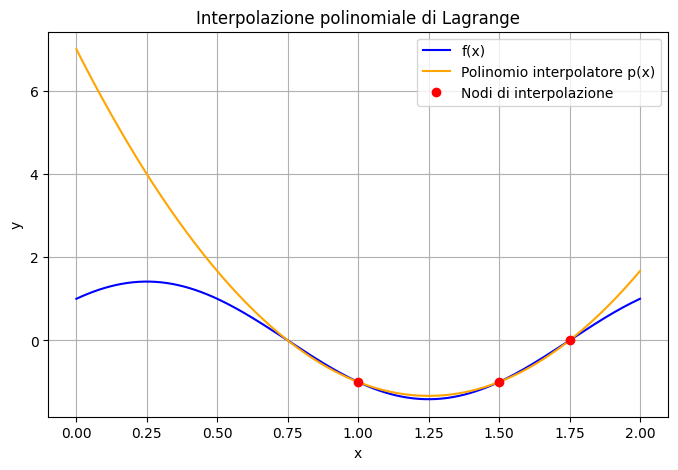

Costante di Lebesgue: 29.0


In [448]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(np.pi * x) + np.sin(np.pi * x)

x_nodes = np.array([1, 1.5, 1.75])
y_nodes = f(x_nodes)

xx = np.linspace(0, 2, 200)
ff = f(xx)

p_vals = InterpL(x_nodes, y_nodes, xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, ff, label="f(x)", color="blue")
plt.plot(xx, p_vals, label="Polinomio interpolatore p(x)", color="orange")
plt.plot(x_nodes, y_nodes, "ro", label="Nodi di interpolazione")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolazione polinomiale di Lagrange")
plt.grid(True)
plt.show()

x_star = 0.75
p_xstar = InterpL(x_nodes, y_nodes, np.array([x_star]))[0]
err_xstar = np.abs(f(x_star) - p_xstar)

x_nodes2 = np.array([0.75, 1, 1.5, 1.75])
y_nodes2 = f(x_nodes2)

# Coefficienti del polinomio interpolatore (opzionale: np.polyfit per confronto)
p2_vals = InterpL(x_nodes2, y_nodes2, xx)

# Calcolo della costante di Lebesgue
# Si valuta la somma dei valori assoluti dei polinomi fondamentali di Lagrange
lebesgue_vals = np.zeros_like(xx)
for j in range(len(x_nodes)):
    p = plagr(x_nodes, j)
    lebesgue_vals += np.abs(np.polyval(p, xx))
lebesgue_const = np.max(lebesgue_vals)

print(f"Costante di Lebesgue:", lebesgue_const)

# La costante di Lebesgue misura quanto l'operatore di interpolazione può amplificare gli errori sui dati. 
# Un valore elevato indica che piccoli errori nei dati possono portare a grandi errori nell'interpolante. 
# È quindi un indicatore della stabilità dell'interpolazione polinomiale rispetto ai nodi scelti.

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**Risolvere un problema mediante Machine Learning significa**:
- Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
- Fornire alla macchina le esatte istruzioni per risolvere il problema
edizione

In [449]:
# Risposta: PUNTO [**1**]

**2  A cosa serve il validation set?**
-  A trovare i migliori iperparametri del modello
-  Ad addestrare il modello
-  A testare il modello
-  A trovare le etichette dei dati di input

In [450]:
# Risposta: PUNTO [**1**]

**3  Una classica rete CNN è solitamente composta da:**  
- Layer convolutivi seguiti da layer di pooling, flatten layer e neuroni completamente connessi
- Layer di pooling seguiti da layer convolutivi, flatten layer e neuroni completamente connessi
- Layer convolutivi seguiti da layer di pooling, flatten layer e softmax
- Layer di pooling seguiti da layer convolutivi, flatten layer e softmax

In [451]:
# Risposta: PUNTO [**1**]

**4 Il livello softmax**
- Trasforma i digits della rete in probabilità
- Trasforma le probabilità della rete in digits
- Normalizza i valori di input della rete
- È indispensabile nel task di regressione della rete


In [452]:
# Risposta: PUNTO [**1**]

**5 Per una rete neurale, l’apprendimento è legato a:**
- Minimizzare la funzione obiettivo
- Minimizzare la funzione di attivazione
- Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation
- Massimizzare il valore della funzione di training

In [453]:
# Risposta: PUNTO [**1**]

**Domande Aperte**

**6. Spiega in modo dettagliato come il learning rate influenza la convergenza di una rete neurale durante il training. Quali sono le conseguenze di un learning rate troppo alto o troppo basso nel training di una rete neurale. Descrivi le principali strategie di  aggiornamentodel  learning rate durante il training di una rete neurale.** [punti 1.5]

In [454]:
# Il learning rate (tasso di apprendimento) è un parametro che controlla quanto i pesi vengono aggiornati a ogni passo della discesa del gradiente.

# Troppo alto -> il modello oscilla intorno al minimo o diverge, quindi non converge, oppure lo fa in modo instabile
# Troppo basso -> il modello converge molto lentamente, potrebbe fermarsi in un minimo locale o impiegare molto tempo a trovare la soluzione

**7. Descrivi in dettaglio l'algoritmo di discesa del gradiente con momento. Quali sono le motivazioni che hanno portato alla sua introduzione rispetto alla discesa del gradiente standard? Fornisci la formula matematica dell'aggiornamento dei pesi in questo algoritmo e spiega il ruolo del termine di momento** [punti 3]

In [455]:
# problema del gradiente con momento: in presenza di valli strette nella superficie della funzione costo, l'algoritmo oscilla (zig-zag) e converge lentamente 
# Motivazioni del momento, è che sommando una parte della direzione del gradiente alla direzione attule, ci si ritrova per 
# accelerare lungo le direzioni corrette e rendere più "morbidi" le oscillazioni

# aggiornamento pesi: W(t + 1) = w(t) + v(t) -> i termini dentro le parentesi sono gli step, non dei parametri, quindi W(t) è il corrente e W(t + 1) il successivo
# il ruolo del termine del momento, controlla quanta parte della direzione precendete viene mantenuta